In [17]:
import numpy as np
import pandas as pd

-------Открытие и анализ файла---------

In [99]:
data = pd.read_excel('Sale_2018.xlsx', sheet_name='DrugstoreSale')

In [100]:
print('У нас %s строк и %s колонок.'%data.shape)
print('---')
print(data.info())

У нас 371412 строк и 10 колонок.
---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371412 entries, 0 to 371411
Data columns (total 10 columns):
DrugstoreSaleID    371412 non-null int64
PharmNetworkID     371412 non-null int64
DrugstoreName      357315 non-null object
DrugstoreCode      162322 non-null object
ProductID          371412 non-null int64
SaleYear           371412 non-null int64
SaleMonth          371412 non-null int64
SaleQuantity       371412 non-null int64
SaleCost           371412 non-null float64
DrugstoreFNID      371407 non-null float64
dtypes: float64(2), int64(6), object(2)
memory usage: 28.3+ MB
None


In [102]:
data.describe()

DrugstoreSaleID  PharmNetworkID      ProductID  SaleYear  \
count     3.714120e+05   371412.000000  371412.000000  371412.0   
mean      4.300614e+05       59.641425       1.254480    2018.0   
std       3.951105e+05       45.588879       0.435569       0.0   
min       1.000000e+00        1.000000       1.000000    2018.0   
25%       1.403578e+05       16.000000       1.000000    2018.0   
50%       2.361945e+05       57.000000       1.000000    2018.0   
75%       9.768812e+05       94.000000       2.000000    2018.0   
max       1.074984e+06      151.000000       2.000000    2018.0   

           SaleMonth   SaleQuantity  SaleCost  DrugstoreFNID  
count  371412.000000  371412.000000  371412.0  371407.000000  
mean        7.601849      33.774095       0.0   19766.393256  
std         3.348754      46.221680       0.0   10749.576055  
min         1.000000      -8.000000       0.0       1.000000  
25%         5.000000       8.000000       0.0   11347.000000  
50%         8.000000      19.000000       0.0   19819.000000  
75%        10.000000      41.000000       0.0   27873.000000  
max        12.000000    1724.000000       0.0   39763.000000

In [103]:
target_columns = ['PharmNetworkID', 'SaleYear', 'SaleMonth', 'ProductID', 'SaleQuantity']

In [104]:
data2 = data[target_columns]

In [105]:
data2.head()

PharmNetworkID  SaleYear  SaleMonth  ProductID  SaleQuantity
0              20      2018          1          1            48
1              20      2018          1          1            39
2              20      2018          1          1            44
3              20      2018          1          1            34
4              20      2018          1          1            61

-------Часть продукции имеет двойной размер (ProductID - 2), поэтому
нужно добавить новый столбец в котором значения 2 будут переведены в 1------------

In [24]:
data2['Sale20'] = data2['SaleQuantity']*data2['ProductID']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [25]:
data2

PharmNetworkID  SaleYear  SaleMonth  ProductID  SaleQuantity  Sale20
0                   20      2018          1          1            48      48
1                   20      2018          1          1            39      39
2                   20      2018          1          1            44      44
3                   20      2018          1          1            34      34
4                   20      2018          1          1            61      61
5                   20      2018          1          1            50      50
6                   20      2018          1          1            47      47
7                   20      2018          1          1            64      64
8                   20      2018          1          1            42      42
9                   20      2018          1          1            46      46
10                  20      2018          1          1            56      56
11                  20      2018          1          1            59      59
12                  20      2018          1          1            60      60
13                  20      2018          1          1            61      61
14                  20      2018          1          1            76      76
15                  20      2018          1          1            65      65
16                  20      2018          1          1            52      52
17                  20      2018          1          1            56      56
18                  26      2018          1          1            40      40
19                  26      2018          1          1            44      44
20                  26      2018          1          1            11      11
21                  26      2018          1          1            27      27
22                  26      2018          1          1            59      59
23                  26      2018          1          1            46      46
24                  26      2018          1          1            15      15
25                  26      2018          1          1            27      27
26                  26      2018          1          1            17      17
27                  26      2018          1          1            16      16
28                  26      2018          1          1            30      30
29                  26      2018          1          1            44      44
...                ...       ...        ...        ...           ...     ...
371382             151      2018         12          2            22      44
371383             151      2018         12          2            65     130
371384             151      2018         12          2            53     106
371385             151      2018         12          2            46      92
371386             151      2018         12          2             9      18
371387             151      2018         12          2            50     100
371388             151      2018         12          2            85     170
371389             151      2018         12          2            38      76
371390             151      2018         12          2            47      94
371391             151      2018         12          2            29      58
371392             151      2018         12          2            30      60
371393             151      2018         12          2            52     104
371394             151      2018         12          2            83     166
371395             151      2018         12          2           105     210
371396             151      2018         12          2            52     104
371397             151      2018         12          2            45      90
371398             151      2018         12          2            43      86
371399             151      2018         12          2            62     124
371400             151      2018         12          2            70     140
371401             151      2018         12          2            58     116
3714

------------Добавление названия аптечных сетей из словаря--------------

In [26]:
pharmnetworks = pd.read_excel('Dictionary.xlsx', sheet_name='Pharmnetworks')

In [27]:
data2 = data2.merge(pharmnetworks, left_on='PharmNetworkID', right_on='PharmNetworkID', how='left')

In [28]:
data2.head()

PharmNetworkID  SaleYear  SaleMonth  ProductID  SaleQuantity  Sale20  \
0              20      2018          1          1            48      48   
1              20      2018          1          1            39      39   
2              20      2018          1          1            44      44   
3              20      2018          1          1            34      34   
4              20      2018          1          1            61      61   

  PharmNetworkName  
0        ЮКОН-фарм  
1        ЮКОН-фарм  
2        ЮКОН-фарм  
3        ЮКОН-фарм  
4        ЮКОН-фарм

In [29]:
cols = data2.columns.tolist()

In [30]:
cols

['PharmNetworkID',
 'SaleYear',
 'SaleMonth',
 'ProductID',
 'SaleQuantity',
 'Sale20',
 'PharmNetworkName']

In [31]:
cols = cols[-1:] + cols[:-1]

In [32]:
cols

['PharmNetworkName',
 'PharmNetworkID',
 'SaleYear',
 'SaleMonth',
 'ProductID',
 'SaleQuantity',
 'Sale20']

In [33]:
data2 = data2[cols]

In [34]:
data2.head(15)

PharmNetworkName  PharmNetworkID  SaleYear  SaleMonth  ProductID  \
0         ЮКОН-фарм              20      2018          1          1   
1         ЮКОН-фарм              20      2018          1          1   
2         ЮКОН-фарм              20      2018          1          1   
3         ЮКОН-фарм              20      2018          1          1   
4         ЮКОН-фарм              20      2018          1          1   
5         ЮКОН-фарм              20      2018          1          1   
6         ЮКОН-фарм              20      2018          1          1   
7         ЮКОН-фарм              20      2018          1          1   
8         ЮКОН-фарм              20      2018          1          1   
9         ЮКОН-фарм              20      2018          1          1   
10        ЮКОН-фарм              20      2018          1          1   
11        ЮКОН-фарм              20      2018          1          1   
12        ЮКОН-фарм              20      2018          1          1   
13        ЮКОН-фарм              20      2018          1          1   
14        ЮКОН-фарм              20      2018          1          1   

    SaleQuantity  Sale20  
0             48      48  
1             39      39  
2             44      44  
3             34      34  
4             61      61  
5             50      50  
6             47      47  
7             64      64  
8             42      42  
9             46      46  
10            56      56  
11            59      59  
12            60      60  
13            61      61  
14            76      76

--------в словаре содержится тоже самое, но я пытался научиться способу обуздать данные.. пока что не очень--------

In [86]:
network_cols = ['PharmNetworkName', 'PharmNetworkID']
network_id = data2[network_cols]
network_id = network_id.drop_duplicates()
network_id = network_id.sort_values(by=['PharmNetworkID'])
network_id = network_id.reset_index()
network_id = network_id[network_cols]

In [90]:
network_id.head(10)

PharmNetworkName  PharmNetworkID
0               Ригла               1
1            Нео-Фарм               3
2         Фармаимпекс               4
3  Мега Фарм (Москва)               5
4     Аптеки Солнышко               6
5         АПТЕКА-сити               7
6              Живика               8
7           Вита плюс               9
8                ИРИС              10
9    Мой доктор Томск              15

---------Построение графика продаж за 2018 год для выбранной Аптечной Сети--------------

In [83]:
data_select = data2[(data2['PharmNetworkID'] == 19)]

groupcols = ['PharmNetworkName', 'SaleMonth']
data_select = data_select.groupby(groupcols)[['Sale20']].sum()
data_select = data_select.reset_index()

dates = sorted(data2['SaleMonth'].unique())

In [84]:
data_select

PharmNetworkName  SaleMonth  Sale20
0             А.Р.М          1     902
1             А.Р.М          2    1477
2             А.Р.М          3    2159
3             А.Р.М          4     988
4             А.Р.М          5     528
5             А.Р.М          6     353
6             А.Р.М          7     240
7             А.Р.М          8     521
8             А.Р.М          9    1711
9             А.Р.М         10    1149
10            А.Р.М         11    1640
11            А.Р.М         12    2210

In [159]:
#phnetworks = sorted(data2['PharmNetworkName'].unique())

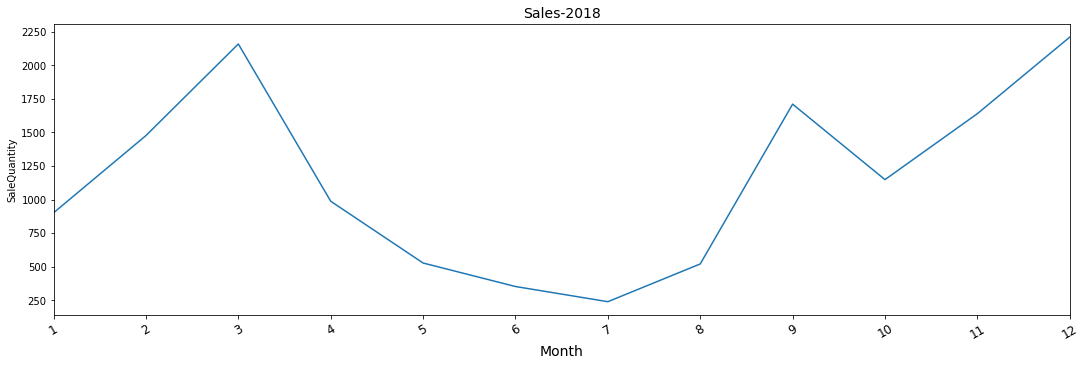

In [160]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(1, 1, figsize=(15,5))
data_select['Sale20'].plot()

plt.xlabel('dates', fontsize=14)
ax = plt.gca()
plt.xticks(np.arange(0, len(dates), 1.0))
ax.set_xticklabels(data_select['SaleMonth'], fontsize=12, rotation=30)
plt.tight_layout()

plt.ylabel('SaleQuantity')
plt.xlabel('Month')
plt.title('Sales-2018', fontsize=14)
#plt.savefig('../SBox/data/mean_check/results/churn.png', dpi=300, bbox_inches='tight')
plt.show()

In [92]:
drugstores = pd.read_excel('Drugstores.xlsx', sheet_name='DrugstoreListFN')

In [94]:
print('У нас %s строк и %s колонок.'%drugstores.shape)
print('---')
print(drugstores.info())

У нас 33492 строк и 14 колонок.
---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33492 entries, 0 to 33491
Data columns (total 14 columns):
DrugstoreFNID             33492 non-null int64
PharmNetworkName          33492 non-null object
PharmNetworkID            33492 non-null int64
PharmNetworkSubName       1083 non-null object
PharmNetworkSubID         883 non-null float64
DrugstoreCode             20457 non-null object
DrugstoreAddress1         33492 non-null object
DrugstoreАddressYandex    33492 non-null object
RegionYandexNameL3        33492 non-null object
RegionYandexNameL3ID      33492 non-null int64
DistrictYandexNameL4      28309 non-null object
DistrictYandexNameL4ID    33492 non-null int64
CityYandexNameL5          33492 non-null object
CityYandexNameL5ID        33481 non-null float64
dtypes: float64(2), int64(4), object(8)
memory usage: 3.6+ MB
None


In [120]:
columns_drugstores = ['DrugstoreFNID', 'RegionYandexNameL3', 'RegionYandexNameL3ID']

In [121]:
drugstores_region = drugstores[columns_drugstores]

In [142]:
drugstores_region.head(10)

DrugstoreFNID RegionYandexNameL3  RegionYandexNameL3ID
0              1             Москва                    77
1              2             Москва                    77
2              3             Москва                    77
3              4             Москва                    77
4              5             Москва                    77
5              6             Москва                    77
6              7             Москва                    77
7              8             Москва                    77
8              9             Москва                    77
9             10             Москва                    77

In [132]:
target_columns2 = ['DrugstoreFNID', 'SaleMonth', 'ProductID', 'SaleQuantity']

In [133]:
data_region = data[target_columns2]

In [134]:
data_region.head()

DrugstoreFNID  SaleMonth  ProductID  SaleQuantity
0        11544.0          1          1            48
1        11545.0          1          1            39
2        11530.0          1          1            44
3        11547.0          1          1            34
4        11541.0          1          1            61

In [135]:
data_region.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371412 entries, 0 to 371411
Data columns (total 4 columns):
DrugstoreFNID    371407 non-null float64
SaleMonth        371412 non-null int64
ProductID        371412 non-null int64
SaleQuantity     371412 non-null int64
dtypes: float64(1), int64(3)
memory usage: 11.3 MB


In [136]:
data_region = data_region.fillna(0)

In [137]:
data_region['DrugstoreFNID'] = data_region['DrugstoreFNID'].astype('int')

In [138]:
data_region.head()

DrugstoreFNID  SaleMonth  ProductID  SaleQuantity
0          11544          1          1            48
1          11545          1          1            39
2          11530          1          1            44
3          11547          1          1            34
4          11541          1          1            61

In [139]:
data_region = data_region.merge(drugstores_region, left_on='DrugstoreFNID', right_on='DrugstoreFNID', how='left')

In [143]:
data_region.head(15)

DrugstoreFNID  SaleMonth  ProductID  SaleQuantity   RegionYandexNameL3  \
0           11544          1          1            48  Челябинская область   
1           11545          1          1            39  Челябинская область   
2           11530          1          1            44  Челябинская область   
3           11547          1          1            34  Челябинская область   
4           11541          1          1            61  Челябинская область   
5           11539          1          1            50  Челябинская область   
6           11540          1          1            47  Челябинская область   
7           11537          1          1            64  Челябинская область   
8           11534          1          1            42  Челябинская область   
9           11532          1          1            46  Челябинская область   
10          11533          1          1            56  Челябинская область   
11          11543          1          1            59  Челябинская область   
12          11542          1          1            60  Челябинская область   
13          11548          1          1            61  Челябинская область   
14          11538          1          1            76  Челябинская область   

    RegionYandexNameL3ID  
0                   74.0  
1                   74.0  
2                   74.0  
3                   74.0  
4                   74.0  
5                   74.0  
6                   74.0  
7                   74.0  
8                   74.0  
9                   74.0  
10                  74.0  
11                  74.0  
12                  74.0  
13                  74.0  
14                  74.0

In [145]:
data_region = data_region.fillna(0)

In [146]:
data_region['RegionYandexNameL3ID'] = data_region['RegionYandexNameL3ID'].astype(int)

In [148]:
data_region['Sale20'] = data_region['SaleQuantity']*data_region['ProductID']

In [152]:
data_region.head(10)

DrugstoreFNID  SaleMonth  ProductID  SaleQuantity   RegionYandexNameL3  \
0          11544          1          1            48  Челябинская область   
1          11545          1          1            39  Челябинская область   
2          11530          1          1            44  Челябинская область   
3          11547          1          1            34  Челябинская область   
4          11541          1          1            61  Челябинская область   
5          11539          1          1            50  Челябинская область   
6          11540          1          1            47  Челябинская область   
7          11537          1          1            64  Челябинская область   
8          11534          1          1            42  Челябинская область   
9          11532          1          1            46  Челябинская область   

   RegionYandexNameL3ID  Sale20  
0                    74      48  
1                    74      39  
2                    74      44  
3                    74      34  
4                    74      61  
5                    74      50  
6                    74      47  
7                    74      64  
8                    74      42  
9                    74      46

In [153]:
region_columns = ['RegionYandexNameL3ID', 'RegionYandexNameL3', 'SaleMonth', 'Sale20']

In [154]:
data_region2 = data_region[region_columns]

In [156]:
data_region2.head()

RegionYandexNameL3ID   RegionYandexNameL3  SaleMonth  Sale20
0                    74  Челябинская область          1      48
1                    74  Челябинская область          1      39
2                    74  Челябинская область          1      44
3                    74  Челябинская область          1      34
4                    74  Челябинская область          1      61

Челябинская область


In [179]:
number_region = 77
name_reg = data_region2[data_region2['RegionYandexNameL3ID'] == number_region]
name_reg2 = name_reg.iloc[0]['RegionYandexNameL3']
#print(name_reg2)


data_region3 = data_region2[(data_region2['RegionYandexNameL3ID'] == number_region)]

groupcols2 = ['RegionYandexNameL3ID', 'RegionYandexNameL3', 'SaleMonth']
data_region3 = data_region3.groupby(groupcols2)[['Sale20']].sum()
data_region3 = data_region3.reset_index()

dates = sorted(data2['SaleMonth'].unique())

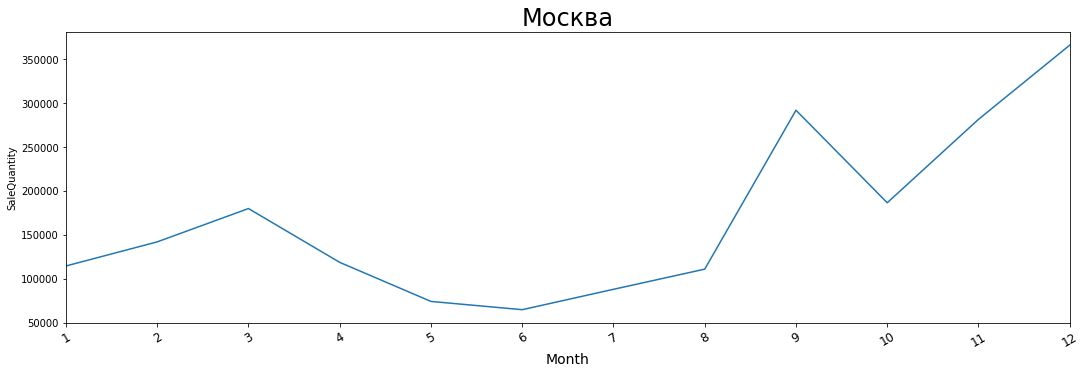

In [180]:
fig, ax = plt.subplots(1, 1, figsize=(15,5))
data_region3['Sale20'].plot()

plt.xlabel('dates', fontsize=14)
ax = plt.gca()
plt.xticks(np.arange(0, len(dates), 1.0))
ax.set_xticklabels(data_region3['SaleMonth'], fontsize=12, rotation=30)
plt.tight_layout()

plt.ylabel('SaleQuantity')
plt.xlabel('Month')
plt.title(name_reg2, fontsize=24)
#plt.savefig('../SBox/data/mean_check/results/churn.png', dpi=300, bbox_inches='tight')
plt.show()